<a href="https://colab.research.google.com/github/allanbraquiel/Just-BI/blob/main/Teste_Just_BI_Apresenta%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Descrição do problema:

Temos alguns pontos que gostaríamos que fossem tratados na construção do Dashboard sendo:

- Aponte resultados de vendas por ano: Gross Revenue, Net Revenue, Boxes (em Gráfico e Tabela)
- Qual customer_acquision_channel teve maior Ticket Médio em 2013 e em 2015?
- Número de clientes únicos por Ano e comparativo desse resultado 2013x2015 (em gráfico e tabela)
- Quais dados complementares você julga que seriam importantes para incrementar suas análises em relação a resultados de vendas e análises sobre os clientes? 


- Faça a projeção de net_revenue para 6 meses futuros utilizando regressão linear, ARIMA e machine learning (Redes neurais | Random forest); compare os resultados.
- Qual modelo teve a melhor performance?
- Quais métricas utilizou para comparar? E por quê?
- Como realizou treino e teste?

(em texto)

Plus:


- Apresentar gráficos (seaborn, ggplot).
- Processamento em cadeia (loops).
- Trazer pontos adicionais que tenham relevância considerando o dataset.


Na reunião de apresentação, a ideia é apresentar a tela / report desenvolvido, deixando claro sua linha de raciocínio e conclusões da sua leitura.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime


import cufflinks as cf
from plotly.offline import plot, iplot
cf.go_offline()

import plotly
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

# habilita o modo offline
plotly.offline.init_notebook_mode(connected=True)

# aumentando o tamanho da figura
import pylab
pylab.rcParams['figure.figsize'] = (20.0, 8.0)

# Renderizar o plotl no colab
import plotly.io as pio
pio.renderers
pio.renderers.default = "colab"

import pylab
pylab.rcParams['figure.figsize'] = (15.0, 10.0)

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Just BI/Dataset_teste_Just_BI - Dataset_teste_Just_BI.csv", sep=";")
df.head()

,customer_id,customer_acquisition_channel,year,week,net_revenue,gross_revenue,boxes
0,206461,Paid Marketing,2014,W09,71,71,2
1,462640,Paid Marketing,2015,W25,28,56,10
2,666461,Referral,2015,W50,40,40,1
3,183202,Referral,2013,W42,18,37,1
4,410993,Referral,2014,W29,0,37,1


In [7]:
df["week"] = df["week"].str.slice(start=1)
df.head()

,customer_id,customer_acquisition_channel,year,week,net_revenue,gross_revenue,boxes
0,206461,Paid Marketing,2014,09,71,71,2
1,462640,Paid Marketing,2015,25,28,56,10
2,666461,Referral,2015,50,40,40,1
3,183202,Referral,2013,42,18,37,1
4,410993,Referral,2014,29,0,37,1


In [8]:
df["year_week"] = df["year"].map(str) + "-" + df["week"] 
df.head()

,customer_id,customer_acquisition_channel,year,week,net_revenue,gross_revenue,boxes,year_week
0,206461,Paid Marketing,2014,09,71,71,2,2014-09
1,462640,Paid Marketing,2015,25,28,56,10,2015-25
2,666461,Referral,2015,50,40,40,1,2015-50
3,183202,Referral,2013,42,18,37,1,2013-42
4,410993,Referral,2014,29,0,37,1,2014-29


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715875 entries, 0 to 715874
Data columns (total 8 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   customer_id                   715875 non-null  int64 
 1   customer_acquisition_channel  715875 non-null  object
 2   year                          715875 non-null  int64 
 3   week                          715875 non-null  object
 4   net_revenue                   715875 non-null  int64 
 5   gross_revenue                 715875 non-null  int64 
 6   boxes                         715875 non-null  int64 
 7   year_week                     715875 non-null  object
dtypes: int64(5), object(3)
memory usage: 43.7+ MB


### Visualização de dados

Resultados de vendas por ano: Gross Revenue (Receita Bruta)

In [10]:
# agrupando a receita bruta por ano
gross_revenue = df.groupby("year")["gross_revenue"].sum()

In [11]:
# Convertento o resultado do agrupamento em um Dataframe
gross_revenue = pd.DataFrame(gross_revenue).reset_index()
gross_revenue.head()

,year,gross_revenue
0,2013,6134328
1,2014,11505225
2,2015,12019567


Text(0.5, 1.0, 'Receita bruta por ano')

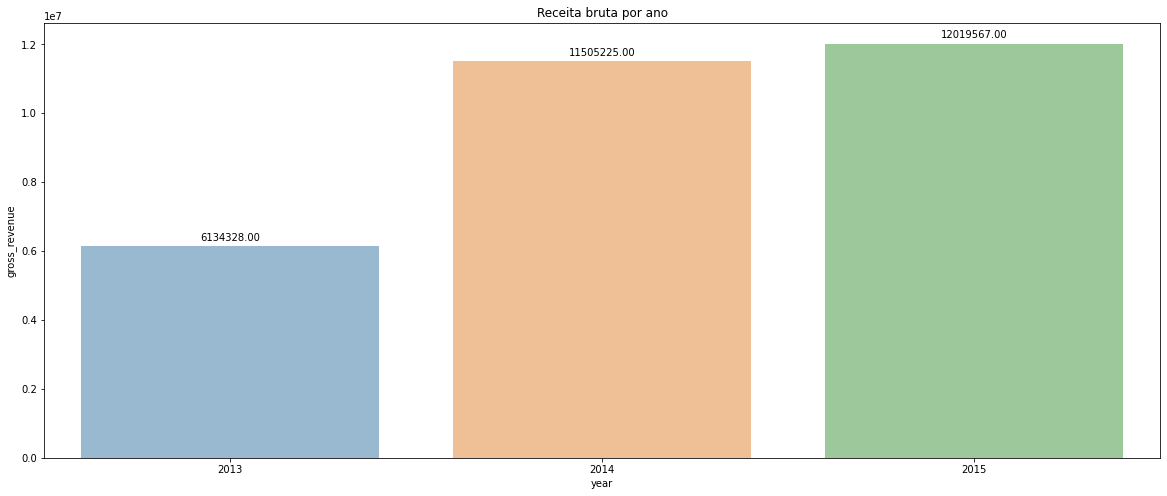

In [12]:
# Plotando o resultado de vendas brutas por ano
ax = sns.barplot(x="year", y="gross_revenue", data=gross_revenue, alpha=0.5)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.title("Receita bruta por ano")

Resultados de vendas por ano: Net Revenue (Receita Líquida)

In [13]:
# Agrupando as receitas por ano
net_revenue = df.groupby("year")["net_revenue"].sum()

In [14]:
# Convertendo em Dataframe
net_revenue = pd.DataFrame(net_revenue).reset_index()
net_revenue.head()

,year,net_revenue
0,2013,5295828
1,2014,10161460
2,2015,10611613


Text(0.5, 1.0, 'Receita Liquida por ano')

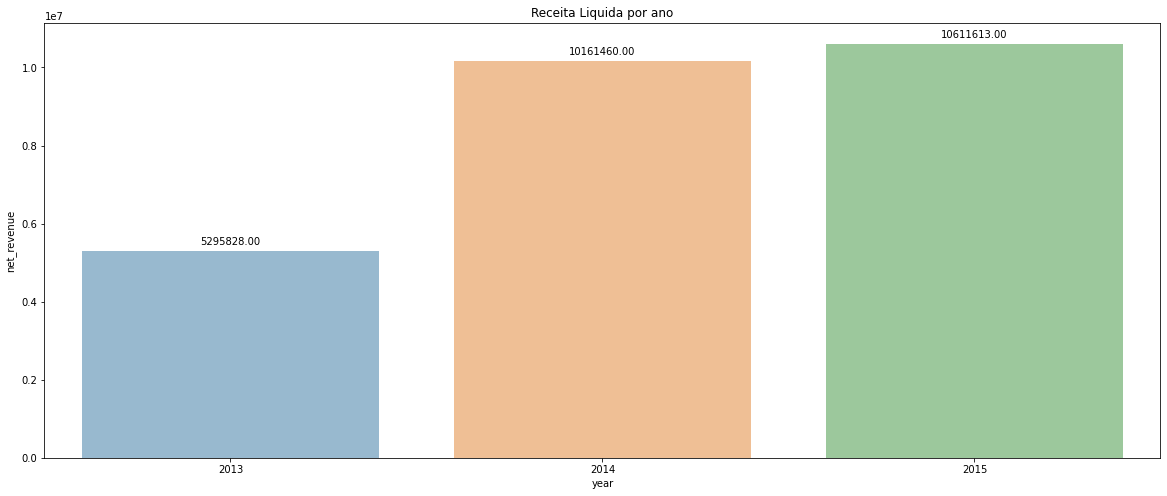

In [15]:
# Plotando o total de receitas liquidas por ano
ax = sns.barplot(x="year", y="net_revenue", data=net_revenue, alpha=0.5)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.title("Receita Liquida por ano")

Resultados de vendas por ano: Boxes (Caixas)

In [16]:
# Agrupando a quantidade de caixas por ano
boxes = df.groupby("year")["boxes"].sum()

In [17]:
# Convertendo em um Dataframe
boxes = pd.DataFrame(boxes).reset_index()
boxes.head()

,year,boxes
0,2013,156289
1,2014,291647
2,2015,292787


Text(0.5, 1.0, 'Total de Caixas por ano')

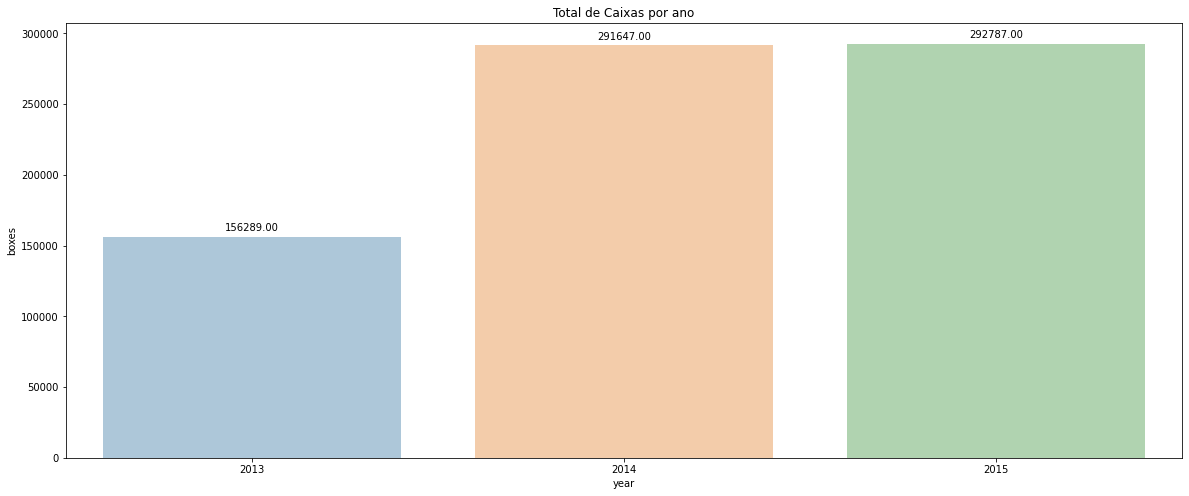

In [18]:
# Plotando a quantidade de caixas por ano
ax = sns.barplot(x="year", y="boxes", data=boxes, alpha=0.4)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.title("Total de Caixas por ano")

In [19]:
# Agrupando todos os valores por ano
result_year = df.groupby("year")[["gross_revenue", "net_revenue", "boxes"]].sum()
result_year = pd.DataFrame(result_year).reset_index()
result_year

,year,gross_revenue,net_revenue,boxes
0,2013,6134328,5295828,156289
1,2014,11505225,10161460,291647
2,2015,12019567,10611613,292787


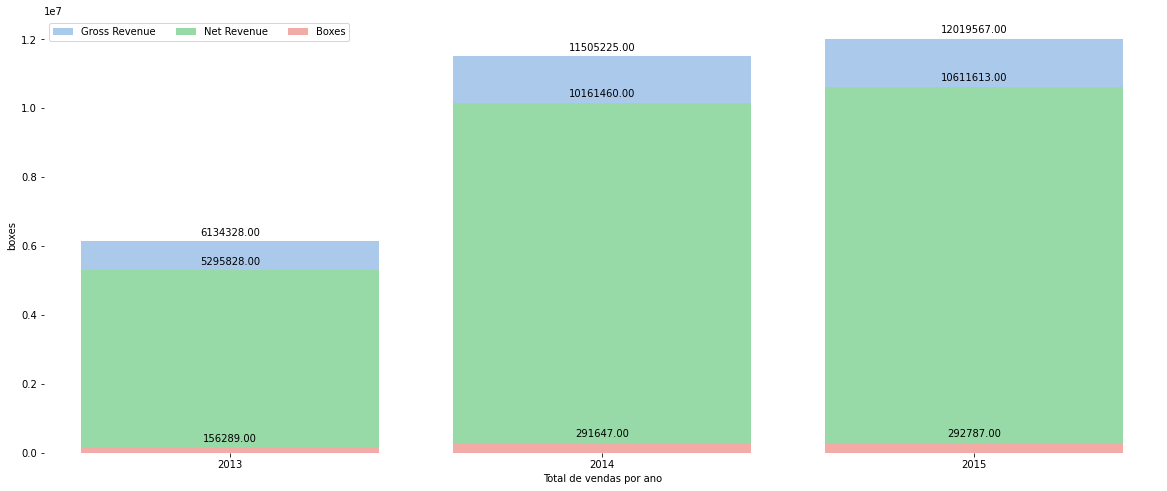

In [20]:
# plotando todos os valores em um só gráfico
f, ax = plt.subplots()

sns.set_color_codes("pastel")

sns.barplot(x="year", y="gross_revenue", data=result_year, label="Gross Revenue", color="b")
sns.barplot(x="year", y="net_revenue", data=result_year, label="Net Revenue", color="g")
sns.barplot(x="year", y="boxes", data=result_year, label="Boxes", color="r")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    

ax.legend(ncol=3, loc="upper left", frameon=True)
ax.set(xlabel="Total de vendas por ano")

sns.despine(left=True, bottom=True)

### Ticket médio em cada canal de aquisição de clientes 

O que é o Ticket médio? É o valor médio das vendas de um determinado período.

- Ticket médio = Faturamento / Quantidade de vendas

In [21]:
# Primeiro precisamos saber a quantitade de vendas por ano
qtde_vendas = pd.DataFrame(df.groupby(["year","customer_acquisition_channel"])["customer_id"].count()).reset_index()
qtde_vendas

,year,customer_acquisition_channel,customer_id
0,2013,Paid Marketing,121299
1,2013,Referral,25878
2,2014,Paid Marketing,227005
3,2014,Referral,53489
4,2015,Paid Marketing,214637
5,2015,Referral,73567


In [22]:
# Agora vamos calcular o total de vendas por ano
valor_vendas = pd.DataFrame(df.groupby(["year","customer_acquisition_channel"])["net_revenue"].sum()).reset_index()
valor_vendas

,year,customer_acquisition_channel,net_revenue
0,2013,Paid Marketing,4489272
1,2013,Referral,806556
2,2014,Paid Marketing,8440431
3,2014,Referral,1721029
4,2015,Paid Marketing,8169031
5,2015,Referral,2442582


In [23]:
# Agora juntamos as duas informações em um único dataframe
df_ticket = pd.merge(qtde_vendas, valor_vendas)
df_ticket

,year,customer_acquisition_channel,customer_id,net_revenue
0,2013,Paid Marketing,121299,4489272
1,2013,Referral,25878,806556
2,2014,Paid Marketing,227005,8440431
3,2014,Referral,53489,1721029
4,2015,Paid Marketing,214637,8169031
5,2015,Referral,73567,2442582


In [24]:
# Calculando o ticket médio com base na quantidade de vendas e valor total liquido
df_ticket["ticket_medio"] = df_ticket["net_revenue"] / df_ticket["customer_id"]
df_ticket

,year,customer_acquisition_channel,customer_id,net_revenue,ticket_medio
0,2013,Paid Marketing,121299,4489272,37.009967
1,2013,Referral,25878,806556,31.167633
2,2014,Paid Marketing,227005,8440431,37.181696
3,2014,Referral,53489,1721029,32.175382
4,2015,Paid Marketing,214637,8169031,38.059752
5,2015,Referral,73567,2442582,33.202142


Text(0.5, 1.0, 'Ticket médio por canal de aquisição e ano')

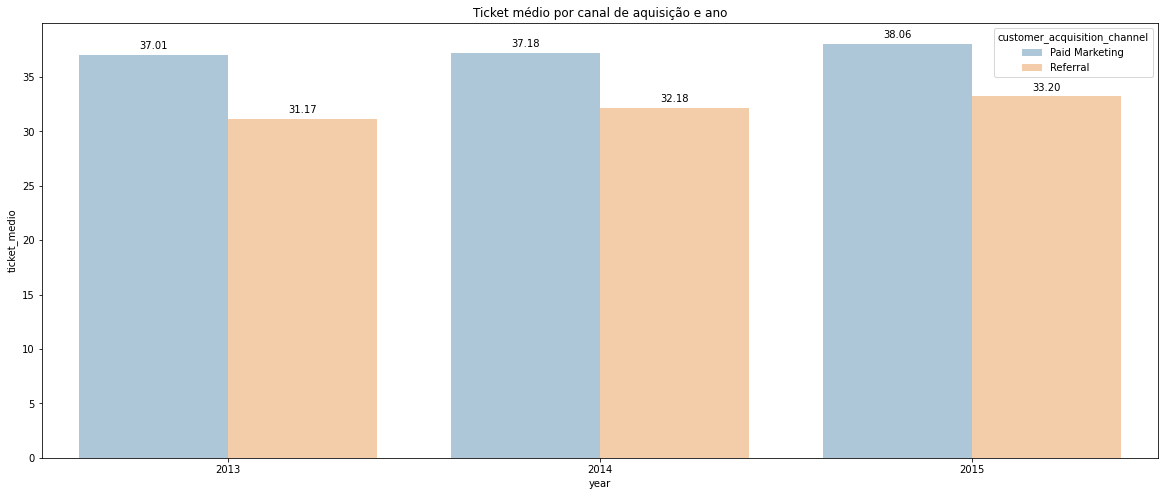

In [25]:
# Este gráfico representa o ticket médio por ano
ax = sns.barplot(x="year", y="ticket_medio", hue="customer_acquisition_channel",
                 data=df_ticket, alpha=0.4)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.title("Ticket médio por canal de aquisição e ano")

In [26]:
maior_2013 = df_ticket.query("year == 2013").sort_values(by="ticket_medio", ascending=False).head(1)
maior_2015 = df_ticket.query("year == 2015").sort_values(by="ticket_medio", ascending=False).head(1)

In [27]:
print(f"Canal com maior Ticket médio em 2013: {maior_2013.customer_acquisition_channel[0]}")
print(f"Valor do Ticket Médio: {maior_2013.ticket_medio[0]:,.2f}")

Canal com maior Ticket médio em 2013: Paid Marketing
Valor do Ticket Médio: 37.01


In [28]:
print(f"Canal com maior Ticket médio em 2015: {maior_2015.customer_acquisition_channel[4]}")
print(f"Valor do Ticket Médio: {maior_2015.ticket_medio[4]}")

Canal com maior Ticket médio em 2015: Paid Marketing
Valor do Ticket Médio: 38.05975204647847


## Quantidade de clientes únicos por ano

In [29]:
# Valores unicos na coluna customer_id
pd.unique(df["customer_id"]).size

118903

In [30]:
# Separando os valores unicos por ano
df_2013 = df.loc[df["year"] == 2013]
df_2014 = df.loc[df["year"] == 2014]
df_2015 = df.loc[df["year"] == 2015]

df_customers = pd.DataFrame([{"year": 2013, "qtde": pd.unique(df_2013["customer_id"]).size},
                               {"year": 2014, "qtde": pd.unique(df_2014["customer_id"]).size},
                               {"year": 2015, "qtde": pd.unique(df_2015["customer_id"]).size}
                               ])

df_customers

,year,qtde
0,2013,35851
1,2014,54865
2,2015,51643


In [31]:
df_customers.qtde.sum()

142359

Text(0.5, 1.0, 'Clientes únicos por ano')

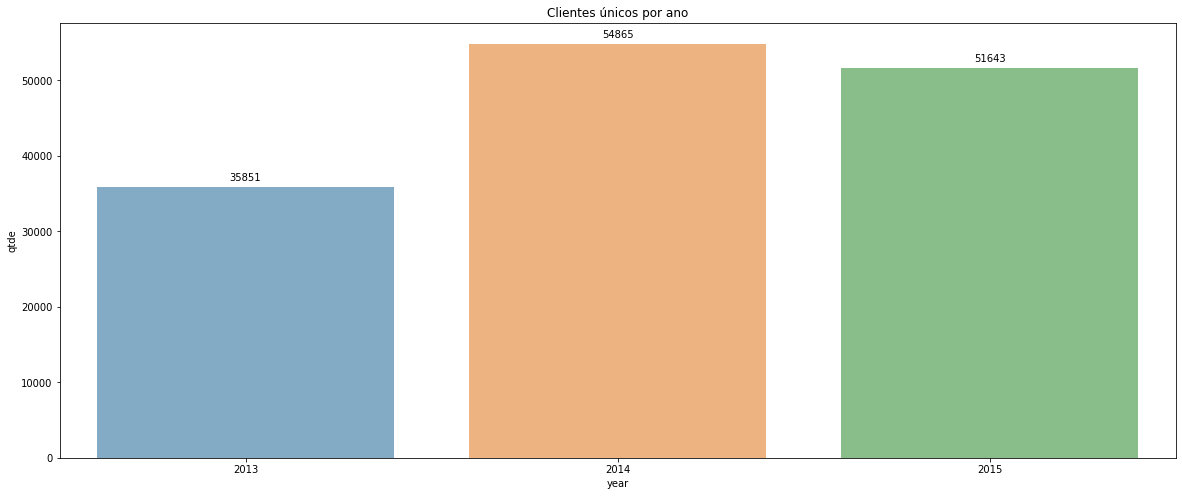

In [32]:
ax = sns.barplot(x="year", y="qtde", data=df_customers, alpha=0.6)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.title("Clientes únicos por ano")

In [33]:
df_customers["difference"] = df_customers["qtde"].diff()
df_customers.fillna(0, inplace=True)
df_customers

,year,qtde,difference
0,2013,35851,0.0
1,2014,54865,19014.0
2,2015,51643,-3222.0


In [34]:
df_customers.difference.sum()

15792.0

In [64]:
fig = px.bar(df_customers, x="year", y="difference", title='Diferença de quantidade de cliente por ano')
fig.show()

In [65]:
df_customers_2 = df_customers.drop(1)

In [66]:
df_customers_2["difference_2"] = df_customers_2["qtde"].diff()
df_customers_2.fillna(0, inplace=True)
df_customers_2

,year,qtde,difference,difference_2
0,2013,35851,0.0,0.0
2,2015,51643,-3222.0,15792.0


In [67]:
fig = px.bar(df_customers_2, x="year", y="difference_2", title='Diferença entre a quantidade de clientes 2013 X 2015')
fig.show()

In [68]:
diff = df_customers_2.difference_2.sum()
print(f"Diferença da quantidade de clientes entre 2013 e 2015: {diff}")

Diferença da quantidade de clientes entre 2013 e 2015: 15792.0


### Total Liquido de vendas por semana a cada ano

In [69]:
df_2013 = df.loc[df["year"] == 2013]
vendas_2013 = df_2013.groupby("week")["net_revenue"].sum()

df_2014 = df.loc[df["year"] == 2014]
vendas_2014 = df_2014.groupby("week")["net_revenue"].sum()

df_2015 = df.loc[df["year"] == 2015]
vendas_2015 = df_2015.groupby("week")["net_revenue"].sum()

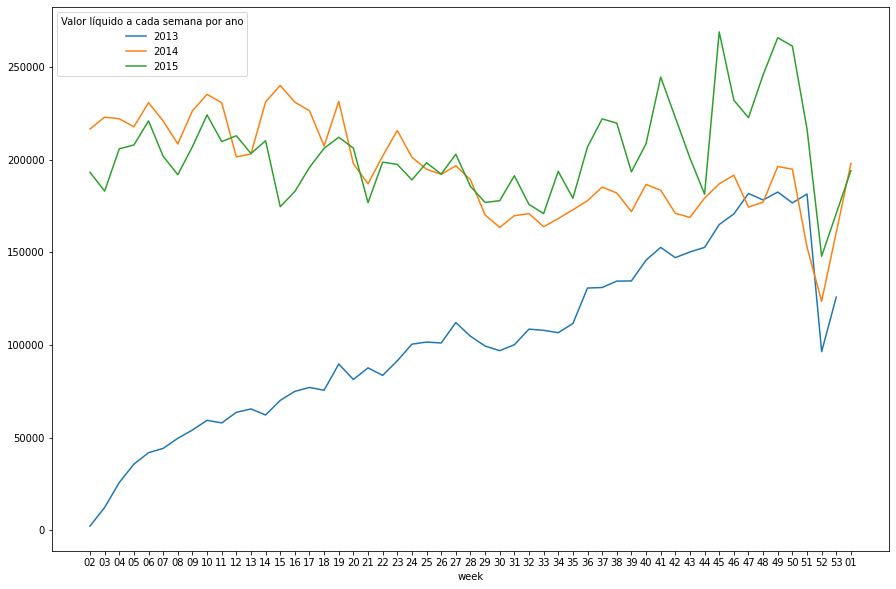

In [70]:
# Valor líquido de vendas por semana separado por ano
ax = sns.lineplot(x=vendas_2013.index, y=vendas_2013.values, label='2013')
ax = sns.lineplot(x=vendas_2014.index, y=vendas_2014.values, label='2014')
ax = sns.lineplot(x=vendas_2015.index, y=vendas_2015.values, label='2015')

plt.legend(title="Valor líquido a cada semana por ano")
plt.show()

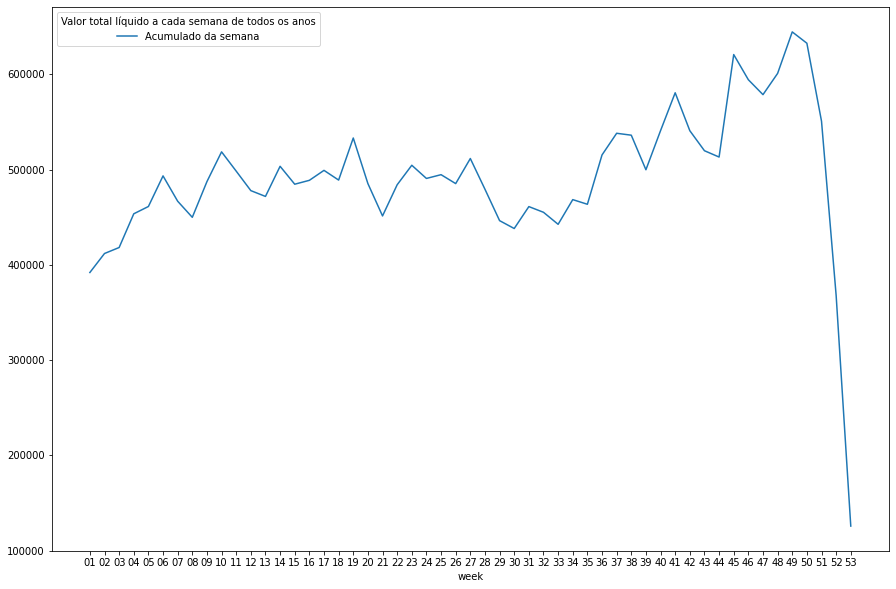

In [71]:
vendas_total = df.groupby("week")["net_revenue"].sum()

ax = sns.lineplot(x=vendas_total.index, y=vendas_total.values, label='Acumulado da semana')

plt.legend(title="Valor total líquido a cada semana de todos os anos")
plt.show()

## Realizando previsões

Arima

AR - AutoRegression. Utiliza valores numericos histporicos para prever os futuros(lag)

I - Integrated. Tecnica para remover a tendencia na serie temporal e facilitar a analise (tornar a serie estacionaria)

MA - Moving Average. Usa erros residuais a partir da media movel

In [72]:
#!pip install pmdarima

In [105]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

import warnings
warnings.filterwarnings("ignore")

import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pmdarima import auto_arima

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

In [106]:
df_arima = df.groupby("year_week")["net_revenue"].sum()
df_arima

year_week
2013-02      2310
2013-03     12342
2013-04     25807
2013-05     35713
2013-06     41898
            ...  
2015-48    245756
2015-49    265797
2015-50    261247
2015-51    216590
2015-52    147896
Name: net_revenue, Length: 156, dtype: int64

Nível de autocorrelação aos lags

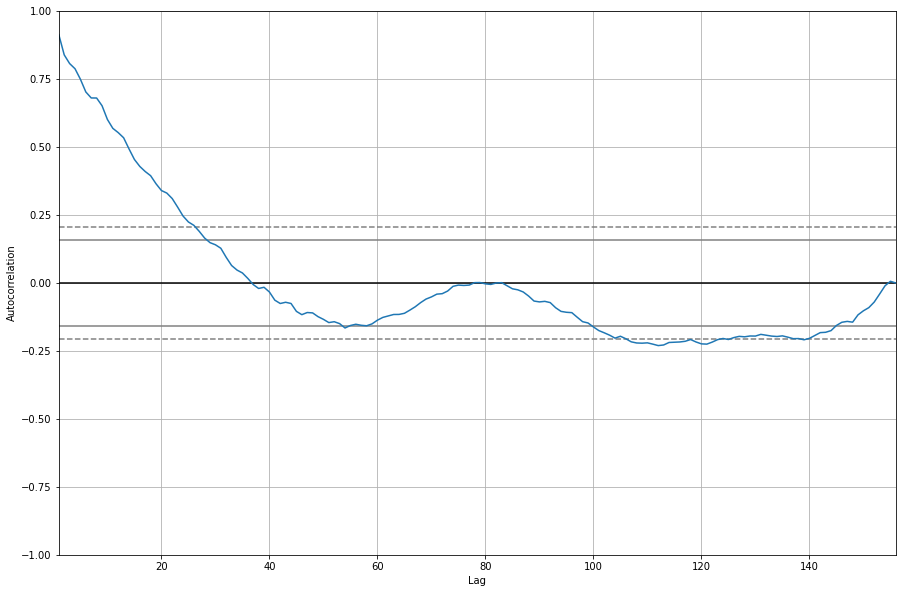

In [107]:
# autocorrelation plot 
autocorrelation_plot(df_arima)
pyplot.show()

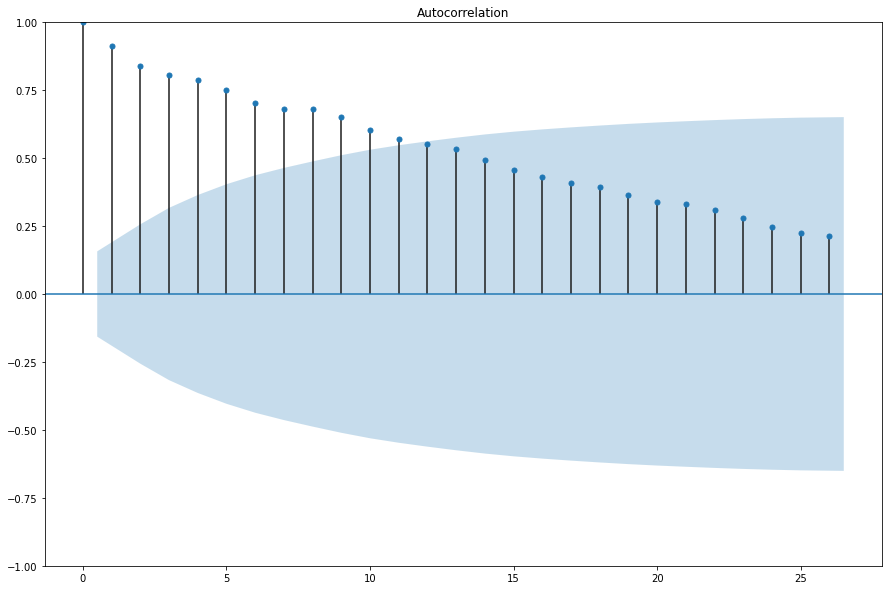

In [108]:
# Correlação parcial = 26 semanas
plot_acf(df_arima, lags=26)
pyplot.show()

In [109]:
# Utilizando o auto-arima para encontrar os melhores parametros para p d e q
fit_arima = auto_arima(df_arima, d=1, start_p=1, start_q=1, max_p=3,
                      seasonal=True, m=6, D=1, start_P=1, start_Q=1,
                      max_P=2, max_Q=2, information_criterion="aic",
                      trace=True, error_action="ignore", stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[6]             : AIC=3418.736, Time=0.23 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=3496.680, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=3446.713, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=0.33 sec
 ARIMA(1,1,1)(0,1,1)[6]             : AIC=3419.802, Time=0.16 sec
 ARIMA(1,1,1)(1,1,0)[6]             : AIC=3433.800, Time=0.20 sec
 ARIMA(1,1,1)(2,1,1)[6]             : AIC=3420.658, Time=0.47 sec
 ARIMA(1,1,1)(1,1,2)[6]             : AIC=3420.700, Time=0.45 sec
 ARIMA(1,1,1)(0,1,0)[6]             : AIC=3467.884, Time=0.12 sec
 ARIMA(1,1,1)(0,1,2)[6]             : AIC=3418.852, Time=0.29 sec
 ARIMA(1,1,1)(2,1,0)[6]             : AIC=3423.708, Time=0.29 sec
 ARIMA(1,1,1)(2,1,2)[6]             : AIC=3422.261, Time=0.63 sec
 ARIMA(0,1,1)(1,1,1)[6]             : AIC=3424.033, Time=0.15 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=3425.691, Time=0.15 sec
 ARIMA(2,1,1)(1,1,1)[6]             : 

In [110]:
# modelo arima para analise de dados - ARIMA(p,d,q)
# p = Quantidade de lags
# d = nível de diferenciaçao
# q = nível de média móvel
model = sm.tsa.arima.ARIMA(df_arima, order=(2,1,2))

In [111]:
model_arima = model.fit()

In [169]:
# Exibindo os resultados do treinamento
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:            net_revenue   No. Observations:                  156
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1735.236
Date:                Mon, 31 Jan 2022   AIC                           3480.472
Time:                        16:48:52   BIC                           3495.689
Sample:                             0   HQIC                          3486.653
                                - 156                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2670      0.063      4.258      0.000       0.144       0.390
ar.L2         -0.9502      0.062    -15.302      0.000      -1.072      -0.828
ma.L1         -0.3882      0.096     -4.048      0.0

- ar.L1 = coeficientes e erro medio do lag 1
- ar.L2 = coeficientes e erro medio do lag 2
- ma.L1 = media movel Lag1
- ma.L2 = media movel Lag2

In [170]:
# Residuais: Erros que aconteceram entre a previsão e o valor real
residuals = pd.DataFrame(model_arima.resid)

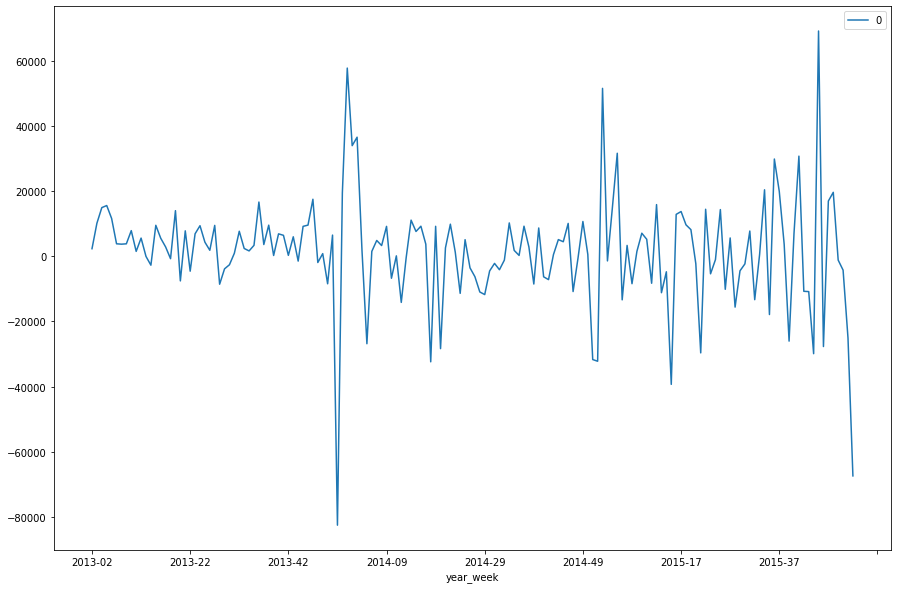

In [171]:
residuals.plot()
pyplot.show()

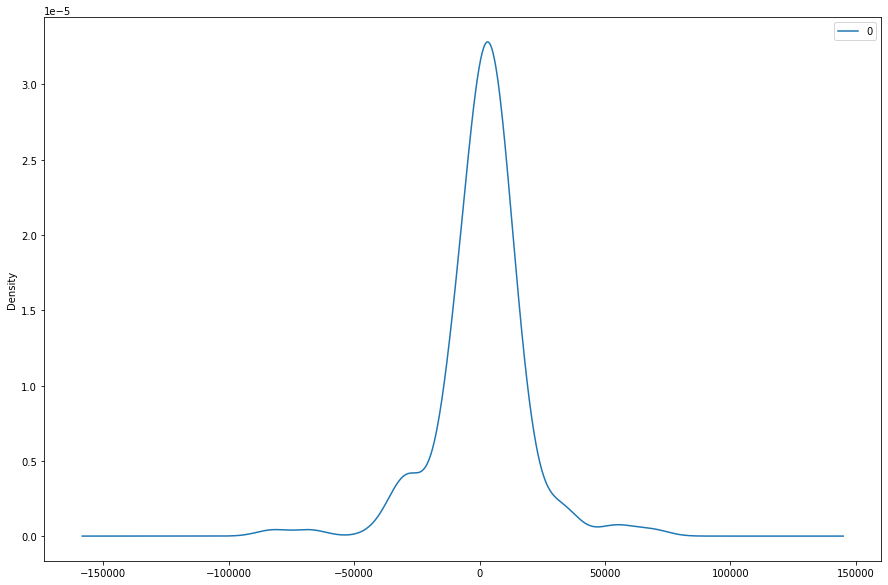

In [172]:
# gráficos de densidade dos residuais para ver a distribuição dos residuais
residuals.plot(kind='kde')
pyplot.show()

In [180]:
# Estatística descritiva dos residuos
print(residuals.describe())

                  0
count    156.000000
mean    1338.192281
std    17468.001979
min   -82515.307426
25%    -4528.316984
50%     2346.926246
75%     9193.067588
max    69104.533917


In [181]:
# Separando os dados de treino e teste
X = df_arima.values
X = X.astype(float)

In [182]:
# Separando os dados em 50% para treino e 50% para teste
size = int(len(X) * 0.50)

In [183]:
train = X[0:size]
test = X[size:]

In [184]:
# Criando uma variavel history que permite fazer o controle dos dados, treinando e testando com os dados seguintes
history = [x for x in train]

In [185]:
# Lista de predição vazia
predictions = list()

In [186]:
# Função para fazer a diferenciação entre o dado predito e o real
def difference(dataset, interval=1):
    diff = list() 
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

# Cria função que reverte o valor diferenciado para o original
def inverse_difference(history, previsao, interval=1):
    return previsao + history[-interval]

In [187]:
# Inicia Walk-Forward para treinar o modelo e testar com a semana seguinte
for t in range(len(test)):
  
    # difference data
    meses_no_ano = 12
    diff = difference(history, meses_no_ano)
    #semanas_no_ano = 52
    #diff = difference(history, semanas_no_ano)
 
    # cria um modelo ARIMA com os dados de history
    model = sm.tsa.arima.ARIMA(diff, order=(1,1,1))
  
    # treina o modelo ARIMA
    model_fit = model.fit()
 
    # a variável valor_predito recebe o valor previsto pelo modelo
    valor_predito = model_fit.forecast()[0]

    # valor_predito recebe o valor revertido (escala original)
    valor_predito = inverse_difference(history, valor_predito, meses_no_ano)
   
    # adiciona o valor predito na lista de predicões
    predictions.append(valor_predito)
  
    # a variável valor_real recebe o valor real do teste
    valor_real = test[t]
  
    # adiciona o valor real a variável history
    history.append(valor_real)

    # imprime valor predito e valor real
    print('Valor predito=%.3f, Valor esperado=%3.f' % (valor_predito, valor_real))

Valor predito=214107.921, Valor esperado=196709
Valor predito=199116.652, Valor esperado=189144
Valor predito=193338.350, Valor esperado=170156
Valor predito=161551.247, Valor esperado=163467
Valor predito=192902.978, Valor esperado=169766
Valor predito=144787.490, Valor esperado=170872
Valor predito=158110.447, Valor esperado=163821
Valor predito=176312.371, Valor esperado=168223
Valor predito=182802.019, Valor esperado=172959
Valor predito=161697.765, Valor esperado=177858
Valor predito=168553.159, Valor esperado=185235
Valor predito=176362.694, Valor esperado=182024
Valor predito=181682.416, Valor esperado=171979
Valor predito=164335.208, Valor esperado=186630
Valor predito=161212.000, Valor esperado=183516
Valor predito=167169.538, Valor esperado=171050
Valor predito=170721.619, Valor esperado=168858
Valor predito=166589.365, Valor esperado=179234
Valor predito=166826.357, Valor esperado=186956
Valor predito=183025.827, Valor esperado=191633
Valor predito=189413.551, Valor esperado

- RMSE (root mean squared error): é a medida que calcula "a raiz quadrática média" dos erros entre valores observados (reais) e predições (hipóteses). 
Expressa o erro médio do modelo preditivo, em relação aos dados originais (treino e teste), quanto menor, melhor

In [189]:
# Avaliando os resultados
from numpy import sqrt
from sklearn.metrics import mean_squared_error
rmse_arima = sqrt(mean_squared_error(test, predictions))
print(f"RMSE Arima: {rmse_arima:,.3f}")

RMSE Arima: 25,848.460


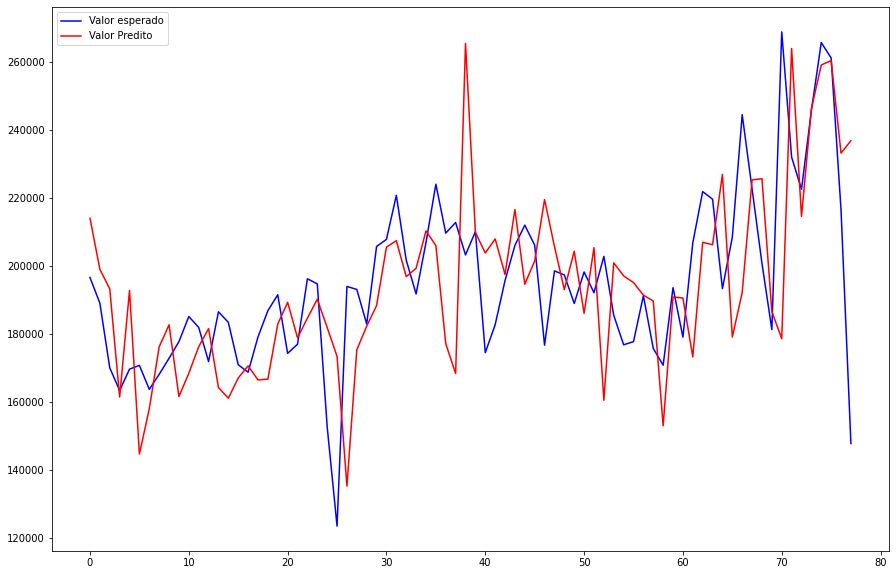

In [190]:
# plot forecasts against actual outcomes 
pyplot.plot(test, color="blue", label="Valor esperado")
pyplot.plot(predictions, color="red", label="Valor Predito")
leg = plt.legend()
pyplot.show()

## Utilizando o XGBoost

In [194]:
from xgboost import XGBRegressor

In [195]:
df.head()

,customer_id,customer_acquisition_channel,year,week,net_revenue,gross_revenue,boxes,year_week
0,206461,Paid Marketing,2014,09,71,71,2,2014-09
1,462640,Paid Marketing,2015,25,28,56,10,2015-25
2,666461,Referral,2015,50,40,40,1,2015-50
3,183202,Referral,2013,42,18,37,1,2013-42
4,410993,Referral,2014,29,0,37,1,2014-29


In [196]:
revenue_week = df.groupby("year_week")["net_revenue"].sum()
revenue_week

year_week
2013-02      2310
2013-03     12342
2013-04     25807
2013-05     35713
2013-06     41898
            ...  
2015-48    245756
2015-49    265797
2015-50    261247
2015-51    216590
2015-52    147896
Name: net_revenue, Length: 156, dtype: int64

In [197]:
revenue_week = pd.DataFrame(revenue_week)
revenue_week

,net_revenue
year_week,
2013-02,2310
2013-03,12342
2013-04,25807
2013-05,35713
2013-06,41898
...,...
2015-48,245756
2015-49,265797
2015-50,261247


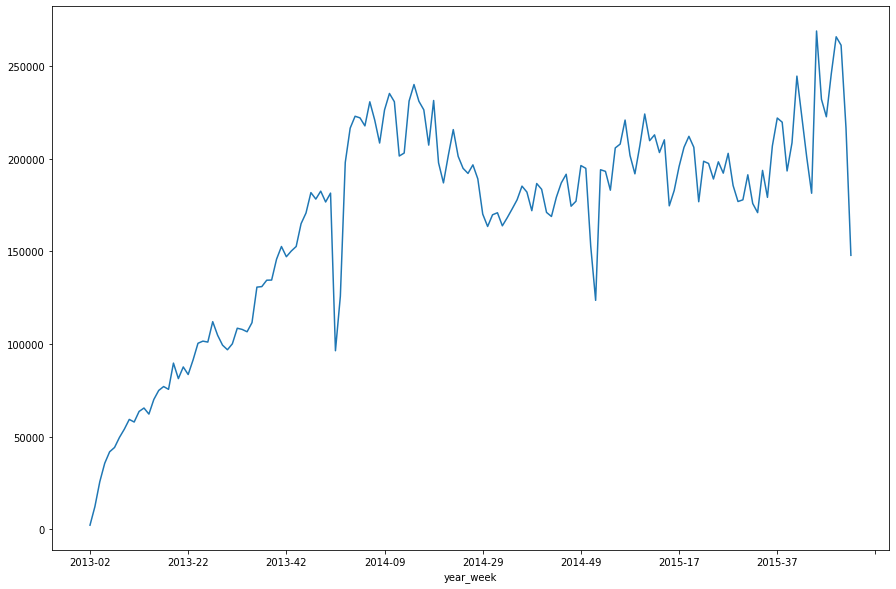

In [198]:
revenue_week["net_revenue"].plot()

In [200]:
# separando os dados de treino e teste, fixando no inicio de 2015
train = revenue_week.loc[revenue_week.index < "2015-01"]
test = revenue_week.loc[revenue_week.index >= "2015-01"]

train.shape, test.shape

((104, 1), (52, 1))

In [201]:
# Conferindo se houve uma divisão correta
train.index.min(), train.index.max()

('2013-02', '2014-52')

In [202]:
test.index.min(), test.index.max()

('2015-01', '2015-52')

In [203]:
# Criando uma variavel target com o valor de uma data posterior a atual (trazer o valor de amanhã pra hoje)
train["target"] = train["net_revenue"].shift(-1)
train

,net_revenue,target
year_week,,
2013-02,2310,12342.0
2013-03,12342,25807.0
2013-04,25807,35713.0
2013-05,35713,41898.0
2013-06,41898,44234.0
...,...,...
2014-48,177092,196323.0
2014-49,196323,194834.0
2014-50,194834,152864.0


In [204]:
train = train.dropna()

In [205]:
test["target"] = test["net_revenue"].shift(-1)
test.head()

,net_revenue,target
year_week,,
2015-01,194073,193201.0
2015-02,193201,183041.0
2015-03,183041,205841.0
2015-04,205841,207919.0
2015-05,207919,220871.0


In [206]:
test = test.dropna()

In [207]:
x_train = train.loc[:, ["net_revenue"]].values
y_train = train.loc[:, ["target"]].values
x_test = test.loc[:, ["net_revenue"]].values
y_test = test.loc[:, ["target"]].values

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((103, 1), (103, 1), (51, 1), (51, 1))

In [208]:
model = XGBRegressor(objective="reg:squarederror", n_estimators=1000)
model.fit(x_train, y_train)

XGBRegressor(n_estimators=1000, objective='reg:squarederror')

In [209]:
predict = model.predict(x_test)
predict

array([192068.75, 196360.73, 171585.58, 231185.02, 231185.02, 208862.44,
       215757.02, 196360.73, 231185.02, 222071.38, 226353.6 , 201609.34,
       231121.14, 226353.6 , 177453.84, 176217.86, 194419.42, 231185.02,
       226353.6 , 231185.02, 181372.33, 216158.58, 187266.36, 170504.28,
       216158.58, 196360.73, 231121.14, 181682.3 , 195949.5 , 185243.83,
       174461.58, 181372.33, 164281.52, 192068.75, 186666.98, 231185.02,
       217733.62, 208862.44, 196360.73, 226353.6 , 230905.66, 222071.38,
       195137.3 ,  96850.29, 230905.66, 198023.8 , 222071.38, 230905.66,
       230905.66, 230905.66, 222966.44], dtype=float32)

In [211]:
# Score do modelo
model.score(x_test, y_test)

-0.92748974154948

In [214]:
baseline_rmse = mean_squared_error(predict, y_test, squared=False)

In [215]:
rmse_xgb = sqrt(mean_squared_error(y_test, predict))
print(f"RMSE XGB: {rmse_xgb:,.3f}")

RMSE XGB: 33,383.292


In [216]:
# Criando um dataframe para plotar o resultado
result = pd.DataFrame(y_test)
result = result.rename(columns={0: "y_test"})
result.head()

,y_test
0,193201.0
1,183041.0
2,205841.0
3,207919.0
4,220871.0


In [217]:
# Adicionando as predições ao dataframe
result["predict"] = pd.DataFrame(predict)
result.head()

,y_test,predict
0,193201.0,192068.750000
1,183041.0,196360.734375
2,205841.0,171585.578125
3,207919.0,231185.015625
4,220871.0,231185.015625


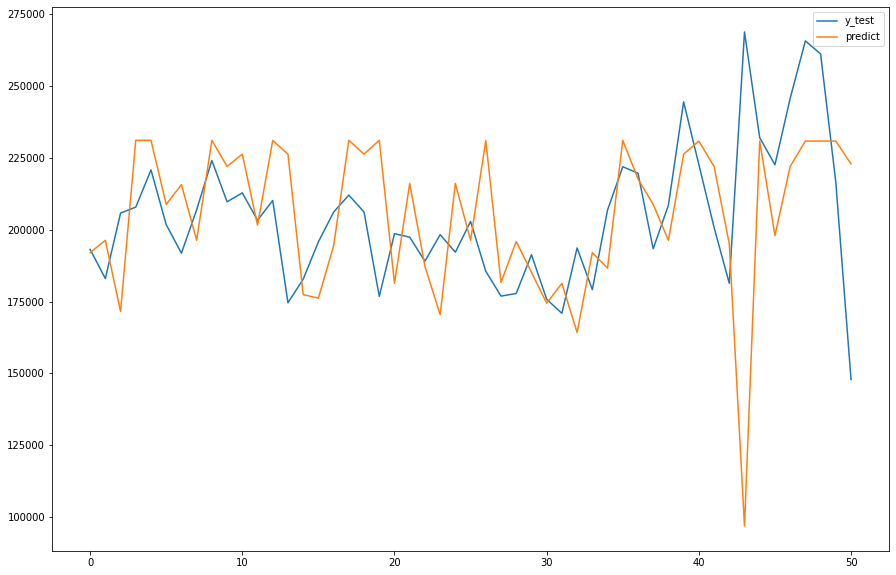

In [218]:
# Plotando a comparação entre o valor predito com o valor real
result.plot()

## Random Forest

In [219]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=1000, max_depth=50, random_state=0)

In [220]:
model_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=50, n_estimators=1000, random_state=0)

In [225]:
predict_rf = model_rf.predict(x_test)

In [226]:
rmse_rf = mean_squared_error(predict_rf, y_test, squared=False)

print(f"RMSE Random forest: {rmse_rf:,.3f}")

RMSE Random forest: 29,785.888


In [229]:
# Criando um Dataframe
result_rf = pd.DataFrame(y_test)
result_rf = result.rename(columns={0: "y_test"})
result_rf.head()

,y_test,predict
0,193201.0,192068.750000
1,183041.0,196360.734375
2,205841.0,171585.578125
3,207919.0,231185.015625
4,220871.0,231185.015625


In [231]:
# Adicionando as predições ao dataframe
result_rf["predict_rf"] = pd.DataFrame(predict_rf)
result_rf.head()

,y_test,predict,predict_rf
0,193201.0,192068.750000,182437.852
1,183041.0,196360.734375,189830.590
2,205841.0,171585.578125,172087.962
3,207919.0,231185.015625,229133.836
4,220871.0,231185.015625,229133.836


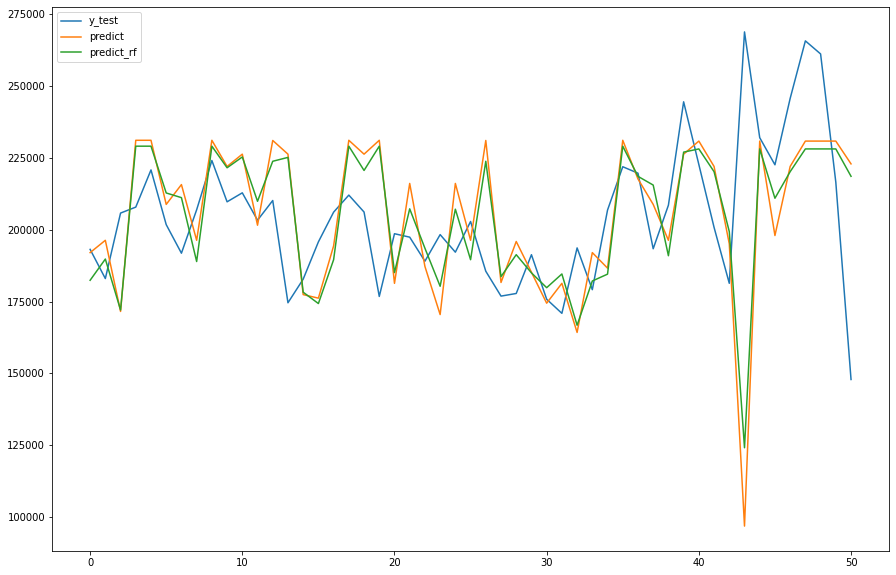

In [232]:
# Plotando a comparação entre o valor predito com o valor real
result_rf.plot()

## Linear Regression

In [159]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()

In [160]:
model_lr.fit(x_train, y_train)

LinearRegression()

In [161]:
model_lr.score(x_test, y_test)

0.08710659893050354

In [162]:
model_lr.coef_

array([[0.93570431]])

In [163]:
model_lr.intercept_

array([10749.46689278])

In [164]:
predict_regression = model_lr.predict(x_test)

In [165]:
rmse_lr = mean_squared_error(predict_regression, y_test, squared=False)
rmse_lr

22974.34629212429

In [234]:
predict_regression

array([[192344.40858065],
       [191528.47442622],
       [182021.718682  ],
       [203355.77684817],
       [205300.17039507],
       [217419.41256034],
       [199594.24553992],
       [190283.05199556],
       [204429.02968662],
       [220480.10134375],
       [207022.80202156],
       [209949.68508927],
       [201024.00171878],
       [207447.61177627],
       [174129.98856913],
       [181821.47796062],
       [193966.91984644],
       [203651.45940872],
       [209209.54298359],
       [203694.50180677],
       [176191.34515422],
       [196629.93429999],
       [195508.96054196],
       [187668.6941659 ],
       [196337.99455667],
       [190617.09843263],
       [200613.22752865],
       [184403.08613958],
       [176301.75826227],
       [177158.86340614],
       [189789.93582654],
       [175289.32620368],
       [170685.66102046],
       [192005.68362205],
       [178394.92879375],
       [204337.33066468],
       [218452.43011365],
       [216350.83824342],
       [1917

In [235]:
# Criando um Dataframe
result_lr = pd.DataFrame(y_test)
result_lr = result_lr.rename(columns={0: "y_test"})
result_lr.head()

,y_test,predict
0,193201.0,192068.750000
1,183041.0,196360.734375
2,205841.0,171585.578125
3,207919.0,231185.015625
4,220871.0,231185.015625


In [237]:
# Adicionando as predições ao dataframe
result_lr["predict_regression"] = pd.DataFrame(predict_regression)
result_lr.head()

,y_test,predict,predict_rf,predict_regression
0,193201.0,192068.750000,192344.408581,192344.408581
1,183041.0,196360.734375,191528.474426,191528.474426
2,205841.0,171585.578125,182021.718682,182021.718682
3,207919.0,231185.015625,203355.776848,203355.776848
4,220871.0,231185.015625,205300.170395,205300.170395


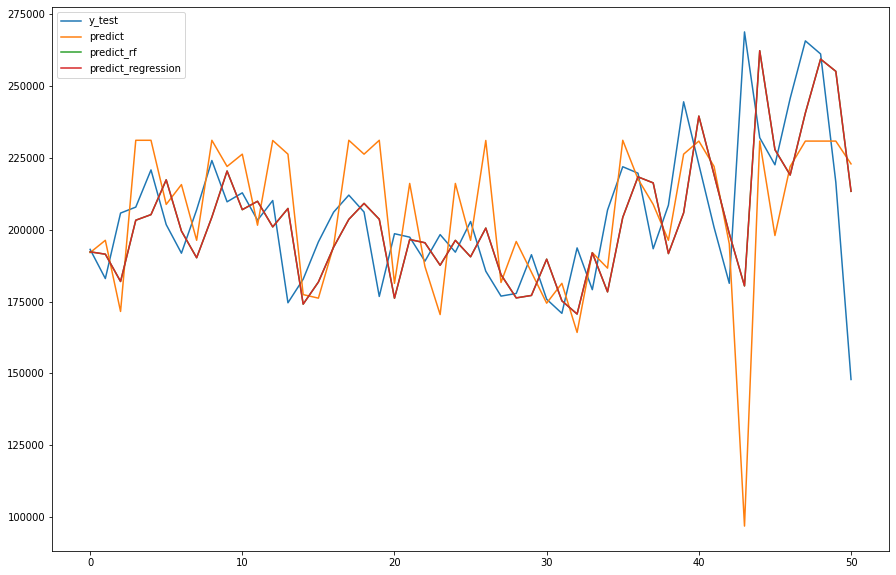

In [239]:
# Plotando a comparação entre o valor predito com o valor real
result_lr.plot()

## Verificando o RMSE de cada algoritmo

In [166]:
print(f"RMSE Arima: {rmse_arima}, \nRMSE XGB: {rmse_xgb}, \nRMSE Random Forest: {rmse_rf}, \nRMSE Linear Regression: {rmse_lr}")

RMSE Arima: 29453.955568266625, 
RMSE XGB: 33383.292422585626, 
RMSE Random Forest: 29785.888346037234, 
RMSE Linear Regression: 22974.34629212429


O algortimo que apresentou o menor erro médio quadrático foi o algoritmo de Regresão Linear

## Conclusões

# Modelos tradicionais X Machine Learning

Arima
- Não permite predição em periodos mais a frente (uma predição atraz da outra)
- modelo para amanha esta pronto para predizer e depois de amanha
- Dificil de tunar, precisa conhecer mais a fundo sobre series temporais
- não pode adicionar atributos que variam no tempo

ML
- Permite fazer predição diretamente(para daqui a 1, 10, 20 dias por exemplo)
- Modelos diferntes, treinar tudo de novo(1 modelo pra 1 dia, outro pra 2 dias)
- Mais facil acertar
- Pode adicionar atributos que variam no tempo